In [248]:
# Importing necessary libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20, 10)

import seaborn as sns
from collections import Counter
from sklearn.metrics import classification_report, confusion_matrix
import joblib

## Reading full data and cleaning data eg. aligning and adding separators
after loading the data it was clear that it was not aligned well. so i used separators to make the data very well aligned for easy reading and cleaning.  

In [249]:
data = pd.read_csv("Data/bank-full.csv")
data.head()

,"age;""job"";""marital"";""education"";""default"";""balance"";""housing"";""loan"";""contact"";""day"";""month"";""duration"";""campaign"";""pdays"";""previous"";""poutcome"";""y"""
0,"58;""management"";""married"";""tertiary"";""no"";2143..."
1,"44;""technician"";""single"";""secondary"";""no"";29;""..."
2,"33;""entrepreneur"";""married"";""secondary"";""no"";2..."
3,"47;""blue-collar"";""married"";""unknown"";""no"";1506..."
4,"33;""unknown"";""single"";""unknown"";""no"";1;""no"";""n..."


In [ ]:
law = pd.read_csv("Data/bank-full.csv", sep=";")
law.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


## Loading, aligning and Cleaning Data
after aligning teh data, i started cleaning the data.
checking for nulls values, knowing the shape, dropping some columns and understanding the data
Clearing outliers, encoding and feature extraction 

In [ ]:
law.shape

(45211, 17)

In [ ]:
law_new = law.drop(["default", "contact", "poutcome"], axis = "columns")
law_new.head()

,age,job,marital,education,balance,housing,loan,day,month,duration,campaign,pdays,previous,y
0,58,management,married,tertiary,2143,yes,no,5,may,261,1,-1,0,no
1,44,technician,single,secondary,29,yes,no,5,may,151,1,-1,0,no
2,33,entrepreneur,married,secondary,2,yes,yes,5,may,76,1,-1,0,no
3,47,blue-collar,married,unknown,1506,yes,no,5,may,92,1,-1,0,no
4,33,unknown,single,unknown,1,no,no,5,may,198,1,-1,0,no


In [ ]:
law_new.shape

(45211, 14)

In [ ]:
law_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   balance    45211 non-null  int64 
 5   housing    45211 non-null  object
 6   loan       45211 non-null  object
 7   day        45211 non-null  int64 
 8   month      45211 non-null  object
 9   duration   45211 non-null  int64 
 10  campaign   45211 non-null  int64 
 11  pdays      45211 non-null  int64 
 12  previous   45211 non-null  int64 
 13  y          45211 non-null  object
dtypes: int64(7), object(7)
memory usage: 4.8+ MB


In [ ]:
law_new.isnull().sum()

age          0
job          0
marital      0
education    0
balance      0
housing      0
loan         0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
y            0
dtype: int64

In [ ]:
# no_o_law = law.copy()
# for column in numerical_feature:
#     IQR = no_o_law[column].quantile(0.75) - no_o_law[column].quantile(0.25)
#     lower_bound = no_o_law[column].quantile(0.25) - 1.5 * IQR
#     upper_bound = no_o_law[column].quantile(0.75) + 1.5 * IQR
#     no_o_law = no_o_law[(no_o_law[column] >= lower_bound) & (no_o_law[column] <= upper_bound)]

In [258]:
law_new.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [260]:
law_new["y"].value_counts(normalize = True)

y
no     0.883015
yes    0.116985
Name: proportion, dtype: float64

In [261]:
month_to_nv = {
    "jan": 1,
    "feb": 2,
    "mar": 3,
    "apr": 4,
    "may": 5,
    "jun": 6,
    "jul": 7,
    "aug": 8,
    "sep": 9,
    "oct": 10,
    "nov": 11,
    "dec": 12
}

for df in [law_new]:
    if "month" in df.columns and df["month"].dtype == "object":
        df["month"] = df["month"].map(month_to_nv)

In [262]:
law_new

,age,job,marital,education,balance,housing,loan,day,month,duration,campaign,pdays,previous,y
0,58,management,married,tertiary,2143,yes,no,5,5,261,1,-1,0,no
1,44,technician,single,secondary,29,yes,no,5,5,151,1,-1,0,no
2,33,entrepreneur,married,secondary,2,yes,yes,5,5,76,1,-1,0,no
3,47,blue-collar,married,unknown,1506,yes,no,5,5,92,1,-1,0,no
4,33,unknown,single,unknown,1,no,no,5,5,198,1,-1,0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,825,no,no,17,11,977,3,-1,0,yes
45207,71,retired,divorced,primary,1729,no,no,17,11,456,2,-1,0,yes
45208,72,retired,married,secondary,5715,no,no,17,11,1127,5,184,3,yes
45209,57,blue-collar,married,secondary,668,no,no,17,11,508,4,-1,0,no


In [263]:
# Changing Yes and No to 1 and 0 (Where Yes is 1 and No is 0)
yes_no_columns = law_new.columns[law_new.isin(["yes", "no"]).any()]
law_new[yes_no_columns] = law_new[yes_no_columns].applymap(lambda x: 1 if x == "yes" else (0 if x == "no" else x))

C:\Users\Law\AppData\Local\Temp\ipykernel_19540\738435519.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  law_new[yes_no_columns] = law_new[yes_no_columns].applymap(lambda x: 1 if x == "yes" else (0 if x == "no" else x))


In [264]:
law_new.head()

,age,job,marital,education,balance,housing,loan,day,month,duration,campaign,pdays,previous,y
0,58,management,married,tertiary,2143,1,0,5,5,261,1,-1,0,0
1,44,technician,single,secondary,29,1,0,5,5,151,1,-1,0,0
2,33,entrepreneur,married,secondary,2,1,1,5,5,76,1,-1,0,0
3,47,blue-collar,married,unknown,1506,1,0,5,5,92,1,-1,0,0
4,33,unknown,single,unknown,1,0,0,5,5,198,1,-1,0,0


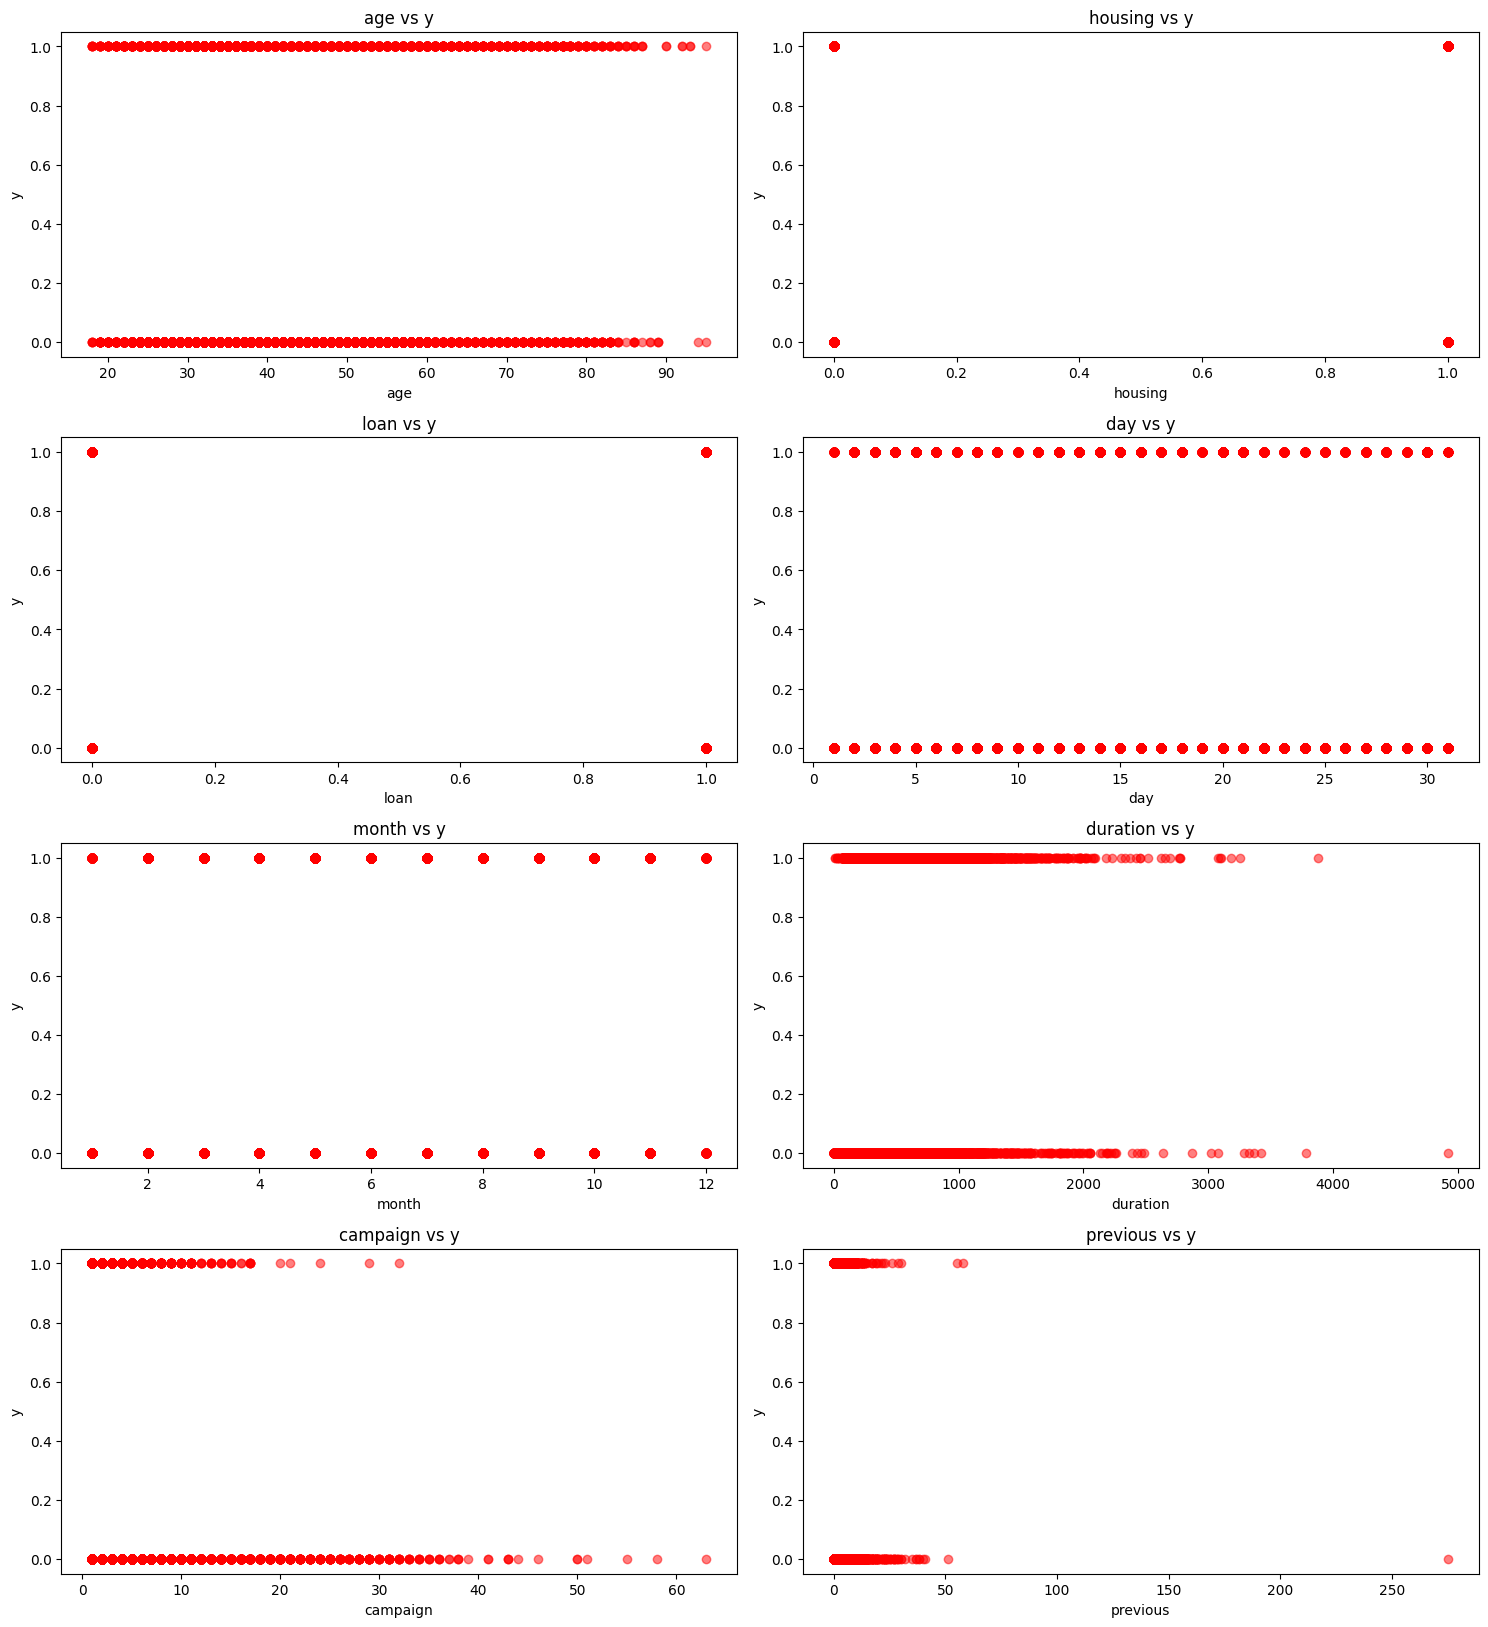

In [266]:
P_values = ["age", "housing", "loan", "day", "month", "duration", "campaign", "previous"]
plt.figure(figsize=(15, 20))
for i, P_values in enumerate(P_values):
    plt.subplot(5, 2, i + 1)
    if law_new[P_values].dtype == "object":
        sns.stripplot(x = P_values, y="y", data = law_new, jitter=True, alpha=0.6)
    else:
        plt.scatter(law_new[P_values], law_new["y"], alpha = 0.5, color = "red")
        plt.xlabel(P_values)
        plt.ylabel("y")
        plt.title(f"{P_values} vs y")

plt.tight_layout()
plt.show()

Encoding Columns

In [280]:
law_new = pd.get_dummies(law_new)

In [277]:
law_new.head()

,age,balance,housing,loan,day,month,duration,campaign,pdays,previous,...,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown
0,58,2143,1,0,5,5,261,1,-1,0,...,0,0,0,0,1,0,0,0,1,0
1,44,29,1,0,5,5,151,1,-1,0,...,1,0,0,0,0,1,0,1,0,0
2,33,2,1,1,5,5,76,1,-1,0,...,0,0,0,0,1,0,0,1,0,0
3,47,1506,1,0,5,5,92,1,-1,0,...,0,0,0,0,1,0,0,0,0,1
4,33,1,0,0,5,5,198,1,-1,0,...,0,0,1,0,0,1,0,0,0,1


In [278]:
print(law_new.dtypes)

age                    int64
balance                int64
housing                int64
loan                   int64
day                    int64
month                  int64
duration               int64
campaign               int64
pdays                  int64
previous               int64
y                      int64
job_admin.             int32
job_blue-collar        int32
job_entrepreneur       int32
job_housemaid          int32
job_management         int32
job_retired            int32
job_self-employed      int32
job_services           int32
job_student            int32
job_technician         int32
job_unemployed         int32
job_unknown            int32
marital_divorced       int32
marital_married        int32
marital_single         int32
education_primary      int32
education_secondary    int32
education_tertiary     int32
education_unknown      int32
dtype: object


Feature Extraction (Numerical and Categorical Extraction)

In [ ]:
numerical_feature = []
categorical_feature = []

for column in law_new.columns:
    if column == "y":
        continue
    elif len(law_new[column].unique()) <= 10:
        categorical_feature.append(column)
    else:
        numerical_feature.append(column)

In [ ]:
law_new.head()

,age,default,balance,housing,loan,day,month,duration,campaign,pdays,...,education_secondary,education_tertiary,education_unknown,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,0,2143,1,0,5,5,261,1,-1,...,0,1,0,0,0,1,0,0,0,1
1,44,0,29,1,0,5,5,151,1,-1,...,1,0,0,0,0,1,0,0,0,1
2,33,0,2,1,1,5,5,76,1,-1,...,1,0,0,0,0,1,0,0,0,1
3,47,0,1506,1,0,5,5,92,1,-1,...,0,0,1,0,0,1,0,0,0,1
4,33,0,1,0,0,5,5,198,1,-1,...,0,0,1,0,0,1,0,0,0,1


In [281]:
law_new.shape

(45211, 30)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [289]:
X = law_new.drop("y", axis ="columns")
X.head()


,age,balance,housing,loan,day,month,duration,campaign,pdays,previous,...,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown
0,58,2143,1,0,5,5,261,1,-1,0,...,0,0,0,0,1,0,0,0,1,0
1,44,29,1,0,5,5,151,1,-1,0,...,1,0,0,0,0,1,0,1,0,0
2,33,2,1,1,5,5,76,1,-1,0,...,0,0,0,0,1,0,0,1,0,0
3,47,1506,1,0,5,5,92,1,-1,0,...,0,0,0,0,1,0,0,0,0,1
4,33,1,0,0,5,5,198,1,-1,0,...,0,0,1,0,0,1,0,0,0,1


In [290]:
y = law_new.y
y.head()

0    0
1    0
2    0
3    0
4    0
Name: y, dtype: int64

In [293]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 10)

In [294]:
model = LogisticRegression()
model.fit(X_train, y_train)
model.score(X_test, y_test)

c:\Users\Law\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8881026094648385

In [298]:
model.predict(X_test,)

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [299]:
y_test

4393     0
4438     0
11108    0
35421    0
2667     0
        ..
37241    0
26105    0
25027    0
6326     0
42721    0
Name: y, Length: 4522, dtype: int64

In [300]:

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
print("\n", Counter(y_test), "\n", Counter(y_pred))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94      3988
           1       0.57      0.21      0.30       534

    accuracy                           0.89      4522
   macro avg       0.74      0.59      0.62      4522
weighted avg       0.86      0.89      0.86      4522


 Counter({0: 3988, 1: 534}) 
 Counter({0: 4328, 1: 194})


In [301]:
joblib.dump(model, "model.pkl")

['model.pkl']